En este notebook analyzamos el sentimiento que expresan las letras (negativo o positivo) con VADER. Creamos también series temporales semanales y mensuales del consumo sentimental, con distintas ponderaciones utilizando las escuchas de las canciones.

# Librerías

In [ ]:
import pandas as pd
import os
import numpy as np
import re
import requests
import time
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
names = lambda o: print([name for name in dir(o) if name[0] != "_"])
names([])

['append', 'clear', 'copy', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']


## VADER

In [ ]:
#Abrimos el df de las lyrics traducidas al inglés
lyrics = pd.read_excel('./data/lyrics.xlsx')
lyrics.dropna(inplace=True) #eliminamos canciones sin lyrics
lyrics.reset_index(inplace=True) #reiniciamos index
lyrics.drop(['Unnamed: 0','Song','Artist','exists','good','index'], axis=1, inplace=True) #eliminamos columnas innecesarias
lyrics

,SongID,lyrics
0,Fake LoveDrake,[Yeah Yeah I've been down so long it look l...
1,Bad and Boujee (feat. Lil Uzi Vert)Migos,"[Yeah, if you hold me down, then I'm gonna hol..."
2,StarboyThe Weeknd,"[I'm tryna put you in the worst mood, ah P1 c..."
3,Black BeatlesRae Sremmurd,[Black beatles in the city be back immediately...
4,CloserThe Chainsmokers,"[Hey, I was doing just fine before I met you ..."
...,...,...
23219,YanıbaşımdanDuman,"[Yeah, yeah, ah Let's play a game, start in my..."
23220,O LA LAGOKO!,"[Effe, because my surname is Fendi Tony, becau..."
23221,Öylece DurdunDolu Kadehi Ters Tut,"[Sick Luke, Sick Luke First only nonstop crime..."
23222,KISKANMASdrk,"[Okay, friends like before, the party is alrea..."


In [ ]:
analyzer = SentimentIntensityAnalyzer() #formula VADER

In [ ]:
#Creamos columnas para los coeficientes
lyrics['positive'] = np.nan
lyrics['negative'] = np.nan
for i in range(len(lyrics)):   #pasamos el algoritmo para cada celda de Lyrics y añadimos en esa fila los coeficientes resultantes
    vs = analyzer.polarity_scores(lyrics.loc[i,'lyrics'])
    v = pd.DataFrame(vs, index = [0])
    lyrics.loc[i,'positive'] = v.loc[0,'pos']
    lyrics.loc[i,'negative'] = v.loc[0,'neg']

In [ ]:
lyrics

,SongID,lyrics,positive,negative
0,Fake LoveDrake,[Yeah Yeah I've been down so long it look l...,0.211,0.112
1,Bad and Boujee (feat. Lil Uzi Vert)Migos,"[Yeah, if you hold me down, then I'm gonna hol...",0.104,0.111
2,StarboyThe Weeknd,"[I'm tryna put you in the worst mood, ah P1 c...",0.063,0.149
3,Black BeatlesRae Sremmurd,[Black beatles in the city be back immediately...,0.136,0.147
4,CloserThe Chainsmokers,"[Hey, I was doing just fine before I met you ...",0.151,0.036
...,...,...,...,...
23219,YanıbaşımdanDuman,"[Yeah, yeah, ah Let's play a game, start in my...",0.178,0.102
23220,O LA LAGOKO!,"[Effe, because my surname is Fendi Tony, becau...",0.079,0.124
23221,Öylece DurdunDolu Kadehi Ters Tut,"[Sick Luke, Sick Luke First only nonstop crime...",0.210,0.105
23222,KISKANMASdrk,"[Okay, friends like before, the party is alrea...",0.156,0.073


In [ ]:
lyrics['positive2'] = np.nan
lyrics['negative2'] = np.nan
for i in range(len(lyrics)):
    if lyrics.loc[i,'positive']>lyrics.loc[i,'negative']:
        lyrics.loc[i,'positive2'] = 1
    else:
        lyrics.loc[i,'positive2'] = 0

    if lyrics.loc[i,'negative']>lyrics.loc[i,'positive']:
        lyrics.loc[i,'negative2'] = 1
    else:
        lyrics.loc[i,'negative2'] = 0


In [ ]:
lyrics

,SongID,lyrics,positive,negative,positive2,negative2
0,Fake LoveDrake,[Yeah Yeah I've been down so long it look l...,0.211,0.112,1.0,0.0
1,Bad and Boujee (feat. Lil Uzi Vert)Migos,"[Yeah, if you hold me down, then I'm gonna hol...",0.104,0.111,0.0,1.0
2,StarboyThe Weeknd,"[I'm tryna put you in the worst mood, ah P1 c...",0.063,0.149,0.0,1.0
3,Black BeatlesRae Sremmurd,[Black beatles in the city be back immediately...,0.136,0.147,0.0,1.0
4,CloserThe Chainsmokers,"[Hey, I was doing just fine before I met you ...",0.151,0.036,1.0,0.0
...,...,...,...,...,...,...
23219,YanıbaşımdanDuman,"[Yeah, yeah, ah Let's play a game, start in my...",0.178,0.102,1.0,0.0
23220,O LA LAGOKO!,"[Effe, because my surname is Fendi Tony, becau...",0.079,0.124,0.0,1.0
23221,Öylece DurdunDolu Kadehi Ters Tut,"[Sick Luke, Sick Luke First only nonstop crime...",0.210,0.105,1.0,0.0
23222,KISKANMASdrk,"[Okay, friends like before, the party is alrea...",0.156,0.073,1.0,0.0


In [ ]:
lyrics.to_excel('./data/lyrics_vader.xlsx',index=False)

## Series temporales

In [ ]:
#Índice todas las canciones
all_index = pd.read_csv("./data/all_index.csv",sep=",")
all_index

,Position,Song,Artist,Streams,URL,date,region,SongID
0,1,Fake Love,Drake,8618267,https://open.spotify.com/track/343YBumqHu19cGo...,2016-12-23 00:00:00,us,Fake LoveDrake
1,2,Bad and Boujee (feat. Lil Uzi Vert),Migos,7946032,https://open.spotify.com/track/4Km5HrUvYTaSUfi...,2016-12-23 00:00:00,us,Bad and Boujee (feat. Lil Uzi Vert)Migos
2,3,Starboy,The Weeknd,7738517,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2016-12-23 00:00:00,us,StarboyThe Weeknd
3,4,Black Beatles,Rae Sremmurd,6209336,https://open.spotify.com/track/6fujklziTHa8uoM...,2016-12-23 00:00:00,us,Black BeatlesRae Sremmurd
4,5,Closer,The Chainsmokers,5813157,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2016-12-23 00:00:00,us,CloserThe Chainsmokers
...,...,...,...,...,...,...,...,...
1744795,196,Karam,Hakan Peker,238234,https://open.spotify.com/track/52stTfJTry7xOd6...,2021-10-08 00:00:00,tr,KaramHakan Peker
1744796,197,Dip,Madrigal,238147,https://open.spotify.com/track/17MzeMBa6mWeY30...,2021-10-08 00:00:00,tr,DipMadrigal
1744797,198,Yüce Aşk,Motive,236658,https://open.spotify.com/track/4nmGipl4hRBing7...,2021-10-08 00:00:00,tr,Yüce AşkMotive
1744798,199,Aldatıldık,Jabbar,236222,https://open.spotify.com/track/5E1gxNXvUGvpvUE...,2021-10-08 00:00:00,tr,AldatıldıkJabbar


In [ ]:
#Lyrics con Coeficientes VADER

lyrics = pd.read_excel('./data/lyrics_vader2.xlsx')

#Quitamos la columna lyrics (demasiada data)
lyrics.drop('lyrics', axis=1, inplace=True)

lyrics.head()

,SongID,positive,negative,positive2,negative2
0,A Holly Jolly Christmas - Single VersionBurl Ives,0.287,0.000,1,0
1,Steady 1234 (feat. Jasmine Thompson & Skizzy M...,0.259,0.057,1,0
2,Party (feat. Usher & Gucci Mane)Chris Brown,0.232,0.113,1,0
3,Shape of YouEd Sheeran,0.220,0.024,1,0
4,SorryFuture,0.103,0.143,0,1


In [ ]:
#Juntamos las bases de datos
total = pd.merge(all_index, lyrics, on='SongID', how='left')
#Quitamos las canciones que no tenemos coeficientes
total.dropna(inplace=True)
total.reset_index(inplace=True)
total.drop('index', axis=1, inplace=True)
total['positive_p'] = total['positive']*total['Streams']
total['negative_p'] = total['negative']*total['Streams']
total

,Position,Song,Artist,Streams,URL,date,region,SongID,positive,negative,positive2,negative2,positive_p,negative_p
0,1,Fake Love,Drake,8618267,https://open.spotify.com/track/343YBumqHu19cGo...,2016-12-23 00:00:00,us,Fake LoveDrake,0.211,0.112,1.0,0.0,1818454.337,965245.904
1,2,Bad and Boujee (feat. Lil Uzi Vert),Migos,7946032,https://open.spotify.com/track/4Km5HrUvYTaSUfi...,2016-12-23 00:00:00,us,Bad and Boujee (feat. Lil Uzi Vert)Migos,0.104,0.111,0.0,1.0,826387.328,882009.552
2,3,Starboy,The Weeknd,7738517,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2016-12-23 00:00:00,us,StarboyThe Weeknd,0.063,0.149,0.0,1.0,487526.571,1153039.033
3,4,Black Beatles,Rae Sremmurd,6209336,https://open.spotify.com/track/6fujklziTHa8uoM...,2016-12-23 00:00:00,us,Black BeatlesRae Sremmurd,0.136,0.147,0.0,1.0,844469.696,912772.392
4,5,Closer,The Chainsmokers,5813157,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2016-12-23 00:00:00,us,CloserThe Chainsmokers,0.151,0.036,1.0,0.0,877786.707,209273.652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1554832,195,Amcalar Geldiğinde,Batuflex,239030,https://open.spotify.com/track/7oECjZ7UjCR4ABQ...,2021-10-08 00:00:00,tr,Amcalar GeldiğindeBatuflex,0.199,0.037,1.0,0.0,47566.970,8844.110
1554833,196,Karam,Hakan Peker,238234,https://open.spotify.com/track/52stTfJTry7xOd6...,2021-10-08 00:00:00,tr,KaramHakan Peker,0.049,0.142,0.0,1.0,11673.466,33829.228
1554834,197,Dip,Madrigal,238147,https://open.spotify.com/track/17MzeMBa6mWeY30...,2021-10-08 00:00:00,tr,DipMadrigal,0.136,0.046,1.0,0.0,32387.992,10954.762
1554835,199,Aldatıldık,Jabbar,236222,https://open.spotify.com/track/5E1gxNXvUGvpvUE...,2021-10-08 00:00:00,tr,AldatıldıkJabbar,0.114,0.107,1.0,0.0,26929.308,25275.754


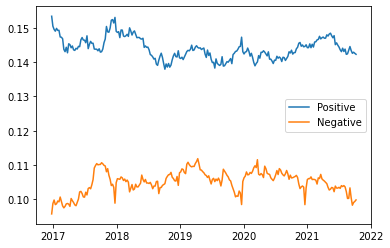

In [ ]:
total.date = pd.to_datetime(total.date)

positive_per_week = total.groupby(['date']).agg({'positive':['mean']})
plt.plot(positive_per_week, label = 'Positive')

negative_per_week = total.groupby(['date']).agg({'negative':['mean']})
plt.plot(negative_per_week, label = 'Negative')

plt.legend(loc="best");

In [ ]:
#Medias semanales
weekly = total.groupby(['date','region']).agg({'positive':['mean'],'negative':['mean'],'positive2':['sum'],'negative2':['sum'],'positive_p':['sum'],'negative_p':['sum']})
weekly = weekly.rename(columns = {'mean':'','sum':''})
weekly = weekly.reset_index()
weekly['songs']=weekly.positive2 + weekly.negative2
weekly

,date,region,positive,negative,positive2,negative2,positive_p,negative_p,songs
,,,,,,,,,
0,2016-12-23,at,0.152370,0.089711,121.0,52.0,8.360244e+05,4.773815e+05,173.0
1,2016-12-23,au,0.163449,0.091022,129.0,49.0,7.230733e+06,4.331239e+06,178.0
2,2016-12-23,be,0.156435,0.099305,120.0,57.0,1.263779e+06,7.916993e+05,177.0
3,2016-12-23,ca,0.153719,0.098719,119.0,58.0,6.225045e+06,4.177254e+06,177.0
4,2016-12-23,ch,0.146377,0.099811,114.0,61.0,9.895484e+05,6.353112e+05,175.0
...,...,...,...,...,...,...,...,...,...
8719,2021-10-08,pt,0.150934,0.101878,125.0,56.0,2.037208e+06,1.286298e+06,181.0
8720,2021-10-08,se,0.134137,0.099071,121.0,61.0,6.046906e+06,4.279681e+06,182.0
8721,2021-10-08,sk,0.137000,0.097147,115.0,54.0,5.023901e+05,3.328102e+05,169.0


In [ ]:
weekly.to_excel('./data/weekly2.xlsx')

In [ ]:
#Añadimos columna con solo mes y año para poder agrupar mensualmente
total['monthly'] = np.nan
total.date=pd.to_datetime(total.date)
for i in range (len(total)):
    total.loc[i,'monthly']=total.loc[i,'date'].strftime("%m-%Y")

In [ ]:
#Medias mensuales

monthly = total.groupby(['monthly','region']).agg({'positive':['mean'],'negative':['mean'],'positive2':['sum'],'negative2':['sum'],'positive_p':['sum'],'negative_p':['sum']})
monthly = monthly.rename(columns = {'mean':'','sum':''})
monthly = monthly.reset_index()
monthly['songs']=monthly.positive2 + monthly.negative2

#Convertimos la fecha a formato fecha
monthly.monthly = pd.to_datetime(monthly.monthly)
#Ordenamos primero por region y luego por fecha
monthly = monthly.sort_values(['region','monthly'])

monthly.reset_index(inplace=True)
monthly.drop(['index'], axis=1, inplace=True)

monthly

<ipython-input-16-22446dfb7bf7>:14: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  monthly.drop(['index'], axis=1, inplace=True)


,monthly,region,positive,negative,positive2,negative2,positive_p,negative_p,songs
,,,,,,,,,
0,2016-12-01,at,0.148269,0.095881,241.0,119.0,1.611361e+06,9.946674e+05,360.0
1,2017-01-01,at,0.143992,0.098437,487.0,246.0,3.260800e+06,2.011848e+06,733.0
2,2017-02-01,at,0.145376,0.097134,500.0,238.0,3.483253e+06,2.170545e+06,738.0
3,2017-03-01,at,0.145841,0.094507,635.0,291.0,4.475623e+06,2.757905e+06,926.0
4,2017-04-01,at,0.143656,0.095759,494.0,235.0,3.311062e+06,2.025978e+06,729.0
...,...,...,...,...,...,...,...,...,...
2047,2021-06-01,us,0.144238,0.119631,460.0,299.0,2.995359e+08,2.460660e+08,759.0
2048,2021-07-01,us,0.143136,0.117803,572.0,374.0,3.496253e+08,2.827994e+08,946.0
2049,2021-08-01,us,0.145794,0.114698,486.0,263.0,2.894301e+08,2.168044e+08,749.0


In [ ]:
monthly = monthly[monthly['region']!='cr']
monthly = monthly[monthly['region']!='il']
monthly = monthly[monthly['region']!='jp']
monthly = monthly[monthly['region']!='kr']
monthly = monthly[monthly['region']!='nz']
monthly.reset_index(inplace=True)
monthly.drop('index',axis=1,inplace=True)
monthly

<ipython-input-17-6215758c45d9>:7: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  monthly.drop('index',axis=1,inplace=True)


,monthly,region,positive,negative,positive2,negative2,positive_p,negative_p,songs
,,,,,,,,,
0,2016-12-01,at,0.148269,0.095881,241.0,119.0,1.611361e+06,9.946674e+05,360.0
1,2017-01-01,at,0.143992,0.098437,487.0,246.0,3.260800e+06,2.011848e+06,733.0
2,2017-02-01,at,0.145376,0.097134,500.0,238.0,3.483253e+06,2.170545e+06,738.0
3,2017-03-01,at,0.145841,0.094507,635.0,291.0,4.475623e+06,2.757905e+06,926.0
4,2017-04-01,at,0.143656,0.095759,494.0,235.0,3.311062e+06,2.025978e+06,729.0
...,...,...,...,...,...,...,...,...,...
1824,2021-06-01,us,0.144238,0.119631,460.0,299.0,2.995359e+08,2.460660e+08,759.0
1825,2021-07-01,us,0.143136,0.117803,572.0,374.0,3.496253e+08,2.827994e+08,946.0
1826,2021-08-01,us,0.145794,0.114698,486.0,263.0,2.894301e+08,2.168044e+08,749.0


In [ ]:
monthly.to_excel('.data//monthly2.xlsx')

### Ponderando por streams

In [ ]:
#añadir id para hacer merge con el total streams de region/date
total['date2']=total['date'].astype(str)
total['id']=total['region']+' '+total['date2']
total

,Position,Song,Artist,Streams,URL,date,region,SongID,positive,negative,positive2,negative2,positive_p,negative_p,monthly,date2,id
0,1,Fake Love,Drake,8618267,https://open.spotify.com/track/343YBumqHu19cGo...,2016-12-23,us,Fake LoveDrake,0.211,0.112,1.0,0.0,1818454.337,965245.904,12-2016,2016-12-23,us 2016-12-23
1,2,Bad and Boujee (feat. Lil Uzi Vert),Migos,7946032,https://open.spotify.com/track/4Km5HrUvYTaSUfi...,2016-12-23,us,Bad and Boujee (feat. Lil Uzi Vert)Migos,0.104,0.111,0.0,1.0,826387.328,882009.552,12-2016,2016-12-23,us 2016-12-23
2,3,Starboy,The Weeknd,7738517,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2016-12-23,us,StarboyThe Weeknd,0.063,0.149,0.0,1.0,487526.571,1153039.033,12-2016,2016-12-23,us 2016-12-23
3,4,Black Beatles,Rae Sremmurd,6209336,https://open.spotify.com/track/6fujklziTHa8uoM...,2016-12-23,us,Black BeatlesRae Sremmurd,0.136,0.147,0.0,1.0,844469.696,912772.392,12-2016,2016-12-23,us 2016-12-23
4,5,Closer,The Chainsmokers,5813157,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2016-12-23,us,CloserThe Chainsmokers,0.151,0.036,1.0,0.0,877786.707,209273.652,12-2016,2016-12-23,us 2016-12-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1554832,195,Amcalar Geldiğinde,Batuflex,239030,https://open.spotify.com/track/7oECjZ7UjCR4ABQ...,2021-10-08,tr,Amcalar GeldiğindeBatuflex,0.199,0.037,1.0,0.0,47566.970,8844.110,10-2021,2021-10-08,tr 2021-10-08
1554833,196,Karam,Hakan Peker,238234,https://open.spotify.com/track/52stTfJTry7xOd6...,2021-10-08,tr,KaramHakan Peker,0.049,0.142,0.0,1.0,11673.466,33829.228,10-2021,2021-10-08,tr 2021-10-08
1554834,197,Dip,Madrigal,238147,https://open.spotify.com/track/17MzeMBa6mWeY30...,2021-10-08,tr,DipMadrigal,0.136,0.046,1.0,0.0,32387.992,10954.762,10-2021,2021-10-08,tr 2021-10-08
1554835,199,Aldatıldık,Jabbar,236222,https://open.spotify.com/track/5E1gxNXvUGvpvUE...,2021-10-08,tr,AldatıldıkJabbar,0.114,0.107,1.0,0.0,26929.308,25275.754,10-2021,2021-10-08,tr 2021-10-08


In [ ]:
#Streams por semana y país (para calcular el coeficiente ponderado)
streams_per_week = total.groupby(['date','region']).agg({'Streams':['sum']})
streams_per_week.rename(columns = {'sum':'','Streams':'streams_region'},inplace=True)
streams_per_week.reset_index(inplace=True)
streams_per_week['date']=streams_per_week['date'].astype(str)
streams_per_week['id']=streams_per_week['region']+' '+streams_per_week['date']
streams_per_week.drop({'region','date'}, axis=1, inplace=True)
streams_per_week

<ipython-input-20-a80c712ed7c2>:7: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  streams_per_week.drop({'region','date'}, axis=1, inplace=True)


,streams_region,id
,,
0,5339417,at 2016-12-23
1,46716221,au 2016-12-23
2,8233270,be 2016-12-23
3,41426101,ca 2016-12-23
4,6557398,ch 2016-12-23
...,...,...
8719,13355588,pt 2021-10-08
8720,44553147,se 2021-10-08
8721,3550908,sk 2021-10-08


In [ ]:
total = pd.merge(total, streams_per_week, on='id', how='left')
total.rename({('streams_region', ''):'streams_region'},axis=1,inplace=True)
total.drop({'date2','id'},axis=1,inplace=True)
total

<ipython-input-22-c69340a3ccc3>:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  total = pd.merge(total, streams_per_week, on='id', how='left')


,Position,Song,Artist,Streams,URL,date,region,SongID,positive,negative,positive2,negative2,positive_p,negative_p,monthly,streams_region
0,1,Fake Love,Drake,8618267,https://open.spotify.com/track/343YBumqHu19cGo...,2016-12-23,us,Fake LoveDrake,0.211,0.112,1.0,0.0,1818454.337,965245.904,12-2016,370328045
1,2,Bad and Boujee (feat. Lil Uzi Vert),Migos,7946032,https://open.spotify.com/track/4Km5HrUvYTaSUfi...,2016-12-23,us,Bad and Boujee (feat. Lil Uzi Vert)Migos,0.104,0.111,0.0,1.0,826387.328,882009.552,12-2016,370328045
2,3,Starboy,The Weeknd,7738517,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2016-12-23,us,StarboyThe Weeknd,0.063,0.149,0.0,1.0,487526.571,1153039.033,12-2016,370328045
3,4,Black Beatles,Rae Sremmurd,6209336,https://open.spotify.com/track/6fujklziTHa8uoM...,2016-12-23,us,Black BeatlesRae Sremmurd,0.136,0.147,0.0,1.0,844469.696,912772.392,12-2016,370328045
4,5,Closer,The Chainsmokers,5813157,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2016-12-23,us,CloserThe Chainsmokers,0.151,0.036,1.0,0.0,877786.707,209273.652,12-2016,370328045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1554832,195,Amcalar Geldiğinde,Batuflex,239030,https://open.spotify.com/track/7oECjZ7UjCR4ABQ...,2021-10-08,tr,Amcalar GeldiğindeBatuflex,0.199,0.037,1.0,0.0,47566.970,8844.110,10-2021,84171245
1554833,196,Karam,Hakan Peker,238234,https://open.spotify.com/track/52stTfJTry7xOd6...,2021-10-08,tr,KaramHakan Peker,0.049,0.142,0.0,1.0,11673.466,33829.228,10-2021,84171245
1554834,197,Dip,Madrigal,238147,https://open.spotify.com/track/17MzeMBa6mWeY30...,2021-10-08,tr,DipMadrigal,0.136,0.046,1.0,0.0,32387.992,10954.762,10-2021,84171245
1554835,199,Aldatıldık,Jabbar,236222,https://open.spotify.com/track/5E1gxNXvUGvpvUE...,2021-10-08,tr,AldatıldıkJabbar,0.114,0.107,1.0,0.0,26929.308,25275.754,10-2021,84171245


In [ ]:
#Metemos las canciones ponderadas por nº de Streams/streams totales de la semana
total['pos_p']=(total['positive']*total['Streams'])/total['streams_region']
total['neg_p']=(total['negative']*total['Streams'])/total['streams_region']
total['songs']=total['positive2']+total['negative2']
total

,Position,Song,Artist,Streams,URL,date,region,SongID,positive,negative,positive2,negative2,positive_p,negative_p,monthly,streams_region,pos_p,neg_p,songs
0,1,Fake Love,Drake,8618267,https://open.spotify.com/track/343YBumqHu19cGo...,2016-12-23,us,Fake LoveDrake,0.211,0.112,1.0,0.0,1818454.337,965245.904,12-2016,370328045,0.004910,0.002606,1.0
1,2,Bad and Boujee (feat. Lil Uzi Vert),Migos,7946032,https://open.spotify.com/track/4Km5HrUvYTaSUfi...,2016-12-23,us,Bad and Boujee (feat. Lil Uzi Vert)Migos,0.104,0.111,0.0,1.0,826387.328,882009.552,12-2016,370328045,0.002232,0.002382,1.0
2,3,Starboy,The Weeknd,7738517,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2016-12-23,us,StarboyThe Weeknd,0.063,0.149,0.0,1.0,487526.571,1153039.033,12-2016,370328045,0.001316,0.003114,1.0
3,4,Black Beatles,Rae Sremmurd,6209336,https://open.spotify.com/track/6fujklziTHa8uoM...,2016-12-23,us,Black BeatlesRae Sremmurd,0.136,0.147,0.0,1.0,844469.696,912772.392,12-2016,370328045,0.002280,0.002465,1.0
4,5,Closer,The Chainsmokers,5813157,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2016-12-23,us,CloserThe Chainsmokers,0.151,0.036,1.0,0.0,877786.707,209273.652,12-2016,370328045,0.002370,0.000565,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1554832,195,Amcalar Geldiğinde,Batuflex,239030,https://open.spotify.com/track/7oECjZ7UjCR4ABQ...,2021-10-08,tr,Amcalar GeldiğindeBatuflex,0.199,0.037,1.0,0.0,47566.970,8844.110,10-2021,84171245,0.000565,0.000105,1.0
1554833,196,Karam,Hakan Peker,238234,https://open.spotify.com/track/52stTfJTry7xOd6...,2021-10-08,tr,KaramHakan Peker,0.049,0.142,0.0,1.0,11673.466,33829.228,10-2021,84171245,0.000139,0.000402,1.0
1554834,197,Dip,Madrigal,238147,https://open.spotify.com/track/17MzeMBa6mWeY30...,2021-10-08,tr,DipMadrigal,0.136,0.046,1.0,0.0,32387.992,10954.762,10-2021,84171245,0.000385,0.000130,1.0
1554835,199,Aldatıldık,Jabbar,236222,https://open.spotify.com/track/5E1gxNXvUGvpvUE...,2021-10-08,tr,AldatıldıkJabbar,0.114,0.107,1.0,0.0,26929.308,25275.754,10-2021,84171245,0.000320,0.000300,1.0


In [ ]:
total['pos2p']=(total['positive2']*total['Streams'])/total['streams_region']
total['neg2p']=(total['negative2']*total['Streams'])/total['streams_region']
total

,Position,Song,Artist,Streams,URL,date,region,SongID,positive,negative,...,negative2,positive_p,negative_p,monthly,streams_region,pos_p,neg_p,songs,pos2p,neg2p
0,1,Fake Love,Drake,8618267,https://open.spotify.com/track/343YBumqHu19cGo...,2016-12-23,us,Fake LoveDrake,0.211,0.112,...,0.0,1818454.337,965245.904,12-2016,370328045,0.004910,0.002606,1.0,0.023272,0.000000
1,2,Bad and Boujee (feat. Lil Uzi Vert),Migos,7946032,https://open.spotify.com/track/4Km5HrUvYTaSUfi...,2016-12-23,us,Bad and Boujee (feat. Lil Uzi Vert)Migos,0.104,0.111,...,1.0,826387.328,882009.552,12-2016,370328045,0.002232,0.002382,1.0,0.000000,0.021457
2,3,Starboy,The Weeknd,7738517,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2016-12-23,us,StarboyThe Weeknd,0.063,0.149,...,1.0,487526.571,1153039.033,12-2016,370328045,0.001316,0.003114,1.0,0.000000,0.020896
3,4,Black Beatles,Rae Sremmurd,6209336,https://open.spotify.com/track/6fujklziTHa8uoM...,2016-12-23,us,Black BeatlesRae Sremmurd,0.136,0.147,...,1.0,844469.696,912772.392,12-2016,370328045,0.002280,0.002465,1.0,0.000000,0.016767
4,5,Closer,The Chainsmokers,5813157,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2016-12-23,us,CloserThe Chainsmokers,0.151,0.036,...,0.0,877786.707,209273.652,12-2016,370328045,0.002370,0.000565,1.0,0.015697,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1554832,195,Amcalar Geldiğinde,Batuflex,239030,https://open.spotify.com/track/7oECjZ7UjCR4ABQ...,2021-10-08,tr,Amcalar GeldiğindeBatuflex,0.199,0.037,...,0.0,47566.970,8844.110,10-2021,84171245,0.000565,0.000105,1.0,0.002840,0.000000
1554833,196,Karam,Hakan Peker,238234,https://open.spotify.com/track/52stTfJTry7xOd6...,2021-10-08,tr,KaramHakan Peker,0.049,0.142,...,1.0,11673.466,33829.228,10-2021,84171245,0.000139,0.000402,1.0,0.000000,0.002830
1554834,197,Dip,Madrigal,238147,https://open.spotify.com/track/17MzeMBa6mWeY30...,2021-10-08,tr,DipMadrigal,0.136,0.046,...,0.0,32387.992,10954.762,10-2021,84171245,0.000385,0.000130,1.0,0.002829,0.000000
1554835,199,Aldatıldık,Jabbar,236222,https://open.spotify.com/track/5E1gxNXvUGvpvUE...,2021-10-08,tr,AldatıldıkJabbar,0.114,0.107,...,0.0,26929.308,25275.754,10-2021,84171245,0.000320,0.000300,1.0,0.002806,0.000000


In [ ]:
total.to_csv('.data/total2.csv',index=False)

In [ ]:
###Weekly database
weekly = total.groupby(['date','region']).agg({'positive':['mean'],'negative':['mean'],'positive2':['sum'],'negative2':['sum'],'positive_p':['mean'],'negative_p':['mean'],'pos_p':['mean'],'neg_p':['mean'],'pos2p':['mean'],'neg2p':['mean']})
weekly = weekly.rename(columns = {'mean':'','sum':''})
weekly = weekly.reset_index()
weekly['songs']=weekly.positive2 + weekly.negative2
weekly['pos2']=weekly['positive2']/weekly['songs']
weekly['neg2']=weekly['negative2']/weekly['songs']
weekly.date=pd.to_datetime(weekly.date)
weekly

,date,region,positive,negative,positive2,negative2,positive_p,negative_p,pos_p,neg_p,pos2p,neg2p,songs,pos2,neg2
,,,,,,,,,,,,,,,
0,2016-12-23,at,0.152370,0.089711,121.0,52.0,4832.511017,2759.430746,0.000905,0.000517,0.004060,0.001720,173.0,0.699422,0.300578
1,2016-12-23,au,0.163449,0.091022,129.0,49.0,40622.093691,24332.802539,0.000870,0.000521,0.003872,0.001746,178.0,0.724719,0.275281
2,2016-12-23,be,0.156435,0.099305,120.0,57.0,7139.994362,4472.877435,0.000867,0.000543,0.003850,0.001799,177.0,0.677966,0.322034
3,2016-12-23,ca,0.153719,0.098719,119.0,58.0,34972.164708,23467.719803,0.000844,0.000566,0.003598,0.002004,177.0,0.672316,0.327684
4,2016-12-23,ch,0.146377,0.099811,114.0,61.0,5654.562354,3630.349823,0.000862,0.000554,0.003818,0.001896,175.0,0.651429,0.348571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8719,2021-10-08,pt,0.150934,0.101878,125.0,56.0,11255.292011,7106.620597,0.000843,0.000532,0.003872,0.001653,181.0,0.690608,0.309392
8720,2021-10-08,se,0.134137,0.099071,121.0,61.0,33043.204022,23386.232628,0.000742,0.000525,0.003728,0.001722,182.0,0.664835,0.335165
8721,2021-10-08,sk,0.137000,0.097147,115.0,54.0,2955.236171,1957.706888,0.000832,0.000551,0.004007,0.001854,169.0,0.680473,0.319527


In [ ]:
weekly.to_excel('./data/weekly2.xlsx')

In [ ]:
#Medias mensuales

monthly = total.groupby(['monthly','region']).agg({'positive':['mean'],'negative':['mean'],'positive2':['sum'],'negative2':['sum'],'positive_p':['mean'],'negative_p':['mean'],'pos_p':['mean'],'neg_p':['mean'],'pos2p':['mean'],'neg2p':['mean']})
monthly = monthly.rename(columns = {'mean':'','sum':''})
monthly = monthly.reset_index()
monthly['songs']=monthly.positive2 + monthly.negative2

#Convertimos la fecha a formato fecha
monthly.monthly = pd.to_datetime(monthly.monthly)
#Ordenamos primero por region y luego por fecha
monthly = monthly.sort_values(['region','monthly'])

monthly.reset_index(inplace=True)
monthly.drop(['index'], axis=1, inplace=True)

monthly

<ipython-input-33-098c74e9a361>:14: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  monthly.drop(['index'], axis=1, inplace=True)


,monthly,region,positive,negative,positive2,negative2,positive_p,negative_p,pos_p,neg_p,pos2p,neg2p,songs
,,,,,,,,,,,,,
0,2016-12-01,at,0.148269,0.095881,241.0,119.0,4476.003936,2762.964917,0.000852,0.000526,0.003752,0.001804,360.0
1,2017-01-01,at,0.143992,0.098437,487.0,246.0,4448.567962,2744.676461,0.000837,0.000516,0.003744,0.001713,733.0
2,2017-02-01,at,0.145376,0.097134,500.0,238.0,4713.467963,2937.137901,0.000832,0.000519,0.003808,0.001601,738.0
3,2017-03-01,at,0.145841,0.094507,635.0,291.0,4817.678532,2968.681337,0.000805,0.000496,0.003821,0.001536,926.0
4,2017-04-01,at,0.143656,0.095759,494.0,235.0,4517.137327,2763.954139,0.000813,0.000498,0.003889,0.001524,729.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2047,2021-06-01,us,0.144238,0.119631,460.0,299.0,394645.514271,324197.612221,0.000760,0.000625,0.003323,0.001947,759.0
2048,2021-07-01,us,0.143136,0.117803,572.0,374.0,369582.786788,298942.327057,0.000764,0.000618,0.003284,0.002001,946.0
2049,2021-08-01,us,0.145794,0.114698,486.0,263.0,386422.010645,289458.435705,0.000796,0.000598,0.003593,0.001747,749.0


In [ ]:
monthly = monthly[monthly['region']!='cr']
monthly = monthly[monthly['region']!='il']
monthly = monthly[monthly['region']!='jp']
monthly = monthly[monthly['region']!='kr']
monthly = monthly[monthly['region']!='nz']
monthly.reset_index(inplace=True)
monthly.drop('index',axis=1,inplace=True)
monthly

<ipython-input-34-6215758c45d9>:7: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  monthly.drop('index',axis=1,inplace=True)


,monthly,region,positive,negative,positive2,negative2,positive_p,negative_p,pos_p,neg_p,pos2p,neg2p,songs
,,,,,,,,,,,,,
0,2016-12-01,at,0.148269,0.095881,241.0,119.0,4476.003936,2762.964917,0.000852,0.000526,0.003752,0.001804,360.0
1,2017-01-01,at,0.143992,0.098437,487.0,246.0,4448.567962,2744.676461,0.000837,0.000516,0.003744,0.001713,733.0
2,2017-02-01,at,0.145376,0.097134,500.0,238.0,4713.467963,2937.137901,0.000832,0.000519,0.003808,0.001601,738.0
3,2017-03-01,at,0.145841,0.094507,635.0,291.0,4817.678532,2968.681337,0.000805,0.000496,0.003821,0.001536,926.0
4,2017-04-01,at,0.143656,0.095759,494.0,235.0,4517.137327,2763.954139,0.000813,0.000498,0.003889,0.001524,729.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1824,2021-06-01,us,0.144238,0.119631,460.0,299.0,394645.514271,324197.612221,0.000760,0.000625,0.003323,0.001947,759.0
1825,2021-07-01,us,0.143136,0.117803,572.0,374.0,369582.786788,298942.327057,0.000764,0.000618,0.003284,0.002001,946.0
1826,2021-08-01,us,0.145794,0.114698,486.0,263.0,386422.010645,289458.435705,0.000796,0.000598,0.003593,0.001747,749.0


In [ ]:
monthly.to_excel('./data/monthly2.xlsx')